### Parallelized simulations

In `medusa`, ensemble Flux Balance Analysis (FBA) can be sped up thanks to the `multiprocessing` Python module. With this approach, each core (or processor) is assigned a subset of ensemble members for which to perform FBA, speeding up the computation in proportion to the number of additional processors allocated.

Let's load a test model to demonstrate parallel ensemble FBA. This ensemble has 1000 members, so each FBA step will return fluxes for each reaction in one of the 1000 members.

In [1]:
from medusa.flux_analysis import flux_balance
from medusa.test import create_test_ensemble
ensemble = create_test_ensemble("Staphylococcus aureus")

Next, perform the actual simulations. To parallelize, just indicate the number of cores you'd like to use with the `num_processes` argument. `medusa` will _not_ automatically recognize that you have additional cores available. We'll use the time module to keep track of how long the simulation takes given the number of cores allocated.

In [2]:
import time

runtimes = {}
for num_processes in range(1,5):
    t0 = time.time()
    flux_balance.optimize_ensemble(ensemble, num_processes = num_processes)
    t1 = time.time()
    runtimes[num_processes] = t1-t0
    print(str(num_processes) + ' processors: ' + str(t1-t0) + 's')

1 processors: 89.6445517539978s
2 processors: 45.74347114562988s
3 processors: 33.75276780128479s
4 processors: 27.72901201248169s


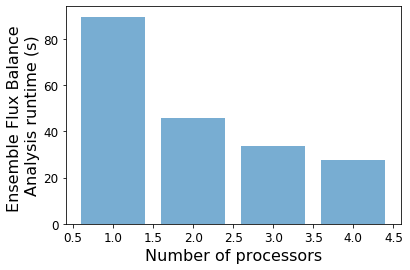

In [5]:
import matplotlib.pylab as plt
fig,ax = plt.subplots()
plt.bar(runtimes.keys(), runtimes.values(), align = 'center', alpha = 0.6)
plt.xlabel('Number of processors')
plt.ylabel('Runtime (s)')
ax.set_xlabel('Number of processors',size=16)
ax.set_ylabel('Ensemble Flux Balance \nAnalysis runtime (s)',size=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('parallel_fba.svg')

As you can see from the printed output and the plots, a couple of additional cores really speeds things up. However, each core requires an additional copy of the ensemble for its independent simulations. This process (serialization and deserialization) leads to diminishing returns as the number of cores is increased. We are working on improving this, but for now, it is best to choose a modest number of cores (e.g. 2-4).